<h1 align="center">K-Means Clustering</h1>

## Central Mall dataset
The "Central mall" collected some information of their 200 customers. Through the membership form they have collected their information of Gender, Age and Annual Income, along with their spending score(The mall computerless spending score for each of their customer based on their mall activity)

Spending Score is a score assigned to the customer based on defined parameters like customer behavior and purchasing data.


The mall wants to understand the customers into different groups so as to guide the marketing team and have them plan the strategy accordingly.

The mall has no idea of what this groups might be. It doesn't even have any idea of how many groups they are looking for. 
And that is specifically what makes this business problem a clustering problem because we dont know what the answers are. We don't know final categories ahead of time. 

So our mission is to find the customer clusters using our knowledge of K-Means Clustering 

In [1]:
# K-Means Clustering

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

#Importing the mall dataset with pandas

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Task 1. Plot the distribution plot for Age, Annual Income (k\\$) and Spending Score (1-100)

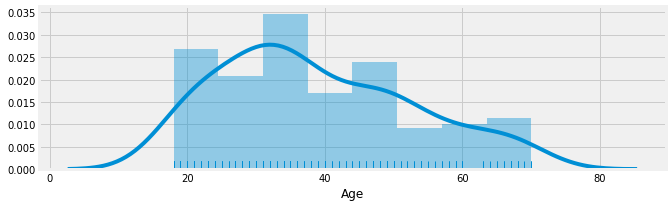

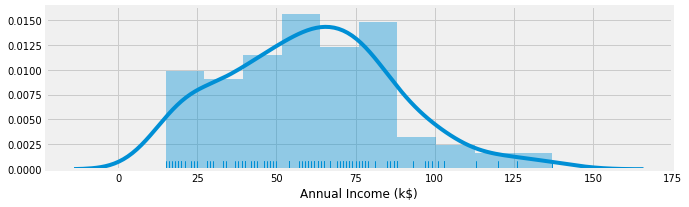

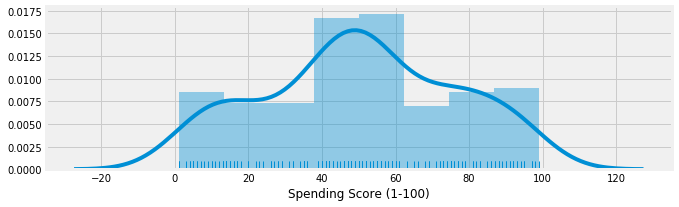

In [2]:
coulmns = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
for col in coulmns:
    plt.figure(figsize=(10,3))
    sns.distplot(dataset[col], hist=True, rug=True)

### Task 2. Plot the distribution bar plot for Gender Column

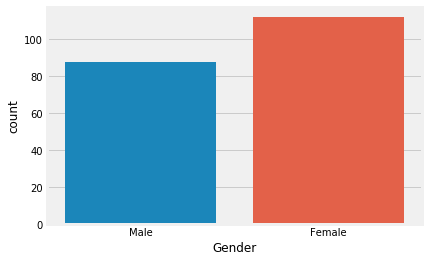

In [3]:
sns.countplot(x="Gender", data=dataset)

### Task 3. Plot the Relation between Age , Annual Income and Spending Score

In [4]:
#sns.relplot(x="Age", y="Annual Income", data=dataset)

### Task 4.  Print the average spending score for men and women

In [5]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
avg_male_spending =dataset[dataset['Gender']=='Male']['Spending Score (1-100)'].sum() / dataset[dataset['Gender']=='Male']['Spending Score (1-100)'].count()

In [7]:
print('average spending score for men:', avg_male_spending)

average spending score for men: 48.51136363636363


In [8]:
avg_female_spending =dataset[dataset['Gender']=='Female']['Spending Score (1-100)'].sum() / dataset[dataset['Gender']=='Female']['Spending Score (1-100)'].count()

In [9]:
print('average spending score for women:', avg_female_spending)

average spending score for women: 51.526785714285715


###  Task 5. Create an array with two columns as `Annual Income (k)` and `Spending Score (1-100)` and store it in X variable.

In [10]:
X = [[dataset['Annual Income (k$)']], [dataset['Spending Score (1-100)']]]

In [11]:
type(X)

list

### Task 6. Using the elbow method find the optimal number of clusters

In [12]:
dataset['Gender'] = dataset['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [13]:

# import packages
from sklearn.cluster import KMeans

# Code starts here

# Empty list for storing WCSS across all values of k
Sum_of_squared_distances = []

# Iterate from 1-9
for i in range (1,10):
    # Initialize KMeans algorithm
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit on data
    km.fit(dataset)
    # Append WCSS to list storing WCSS
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)
# Code ends here

[975512.0599999999, 387065.71377137717, 271384.5087828679, 195401.19855991466, 157157.7579059829, 122625.1981355388, 103233.01724386725, 86053.67444777445, 76938.9756560036]


### Task 7. Plot the graph to visualize the Elbow Method to find the optimal number of cluster 

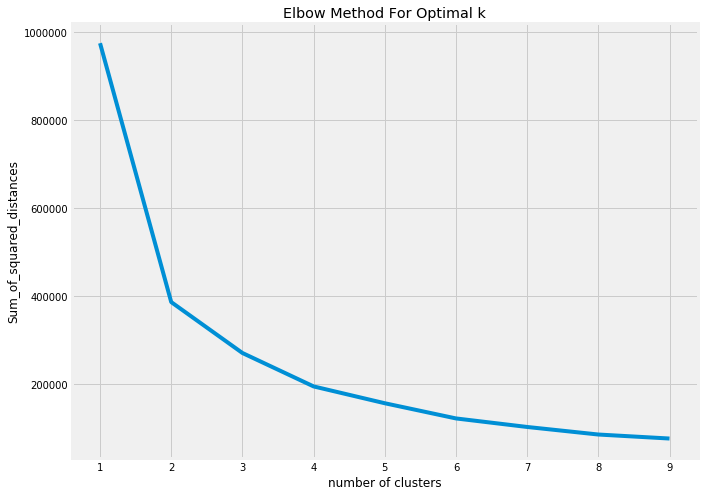

In [14]:
# Initialize figure
plt.figure(figsize=(10,8))

# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1,10), Sum_of_squared_distances)
plt.xlabel('number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Task 8.  Applying KMeans to the dataset with the optimal number of cluster

In [15]:
# Code starts here
km = KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(dataset)

# Cluster centers
centroids = km.cluster_centers_
print("Cluster centers are:", centroids)
print('='*20)
wcss = km.inertia_
# Within cluster sum of squares
print("Within cluster sum of squares is:", wcss)

Cluster centers are: [[164.           0.52777778  40.80555556  87.91666667  17.88888889]
 [ 92.48484848   0.43939394  43.87878788  57.72727273  49.25757576]
 [162.           0.46153846  32.69230769  86.53846154  82.12820513]
 [ 30.06779661   0.37288136  36.10169492  29.86440678  49.86440678]]
Within cluster sum of squares is: 195401.19855991466


### Task 9. Visualize the Clusters

In [16]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(dataset)

In [17]:
# plot the 3 clusters
plt.scatter( X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black',label='cluster 1')

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

TypeError: list indices must be integers or slices, not tuple

### Task 10. Similarly do it for Age and Spending Score

## Quiz

Q1. K-Means is which type of learning algorithm?

```python
A. Supervised
B. Unsupervised
C. Reinforcement
```

Q2. Which of the following algorithm has similarity with K-Means?
```python
A. Support vector machine
B. Logistic regression
C. K-NN
D. Linear regression
```
Q3. K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest _________
```python
A. Median
B. Mode
C. Mean
D. None of the above
```
Q4. The goal for K-Means cost function is to ________ squared error function where error function represents distance between data points and cluster centroid
```python
A. Maximize
B. Minimize
```
Q5. What could be the possible reason(s) for producing two different dendrograms using agglomerative clustering algorithm for the same dataset?
```python
A. Proximity function used
B. of data points used
C. of variables used
D. B and c only
E. All of the above

```
Q6. Which of the following are true?
1. Clustering analysis is negatively affected by multicollinearity of features
2. Clustering analysis is negatively affected by heteroscedasticity

```python
Options:

A. 1 only
B. 2 only
C. 1 and 2
D. None of them
```